In [112]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import statsmodels.api as sm
import scipy.interpolate as spi
import scipy.optimize as spo
import scipy.integrate as sci
from math import sqrt
from matplotlib.patches import Polygon
import sympy as sy

In [7]:
%matplotlib inline

In [3]:
def f(x):
    return np.sin(x) + 0.5 * x

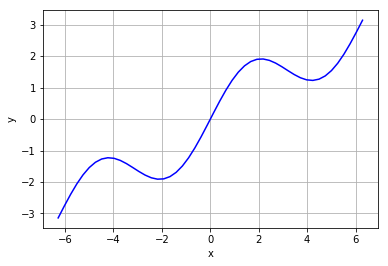

In [8]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [9]:
reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

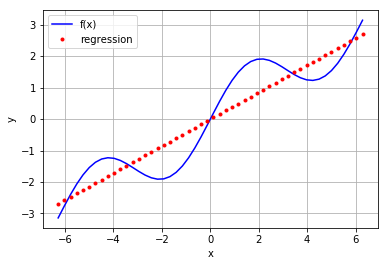

In [10]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [13]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

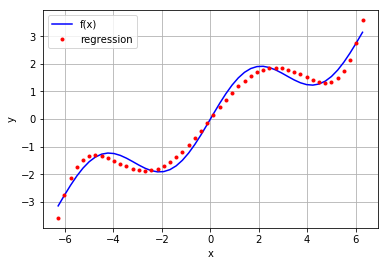

In [14]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [16]:
reg = np.polyfit(x, f(x), deg=7)
ry = np.polyval(reg, x)

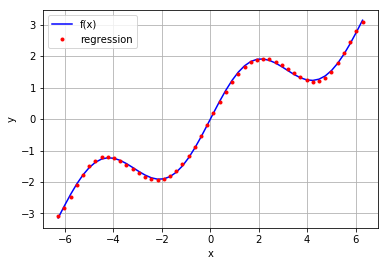

In [17]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [18]:
np.allclose(f(x), ry)

False

In [19]:
np.sum((f(x) - ry) ** 2) / len(x)

0.0017769134759517704

In [20]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [21]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]

In [22]:
reg

array([  1.52685368e-14,   5.62777448e-01,  -1.11022302e-15,
        -5.43553615e-03])

In [23]:
ry = np.dot(reg, matrix)

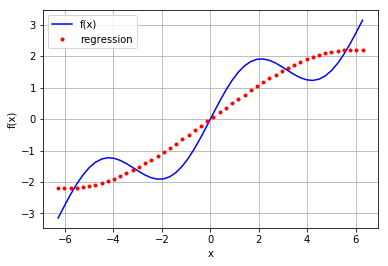

In [24]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [25]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

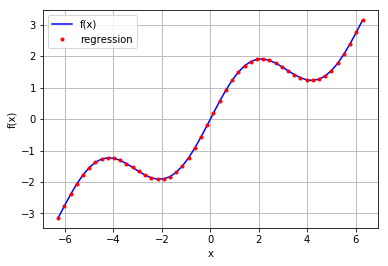

In [26]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [27]:
np.allclose(f(x), ry)

True

In [28]:
np.sum((f(x) - ry) ** 2) / len(x)

1.8541312760604798e-31

In [29]:
reg

array([  9.26243218e-17,   5.00000000e-01,   0.00000000e+00,
         1.00000000e+00])

In [30]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.5 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [31]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

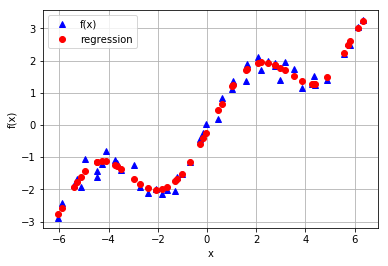

In [32]:
plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [33]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

In [34]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[-0.85  1.64  1.13 -1.02  0.69  5.63  4.65 -1.53 -2.9  -4.32]
[-1.17  1.82  1.47 -1.36  0.98  2.21  1.33 -1.77 -1.69 -1.24]


In [35]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

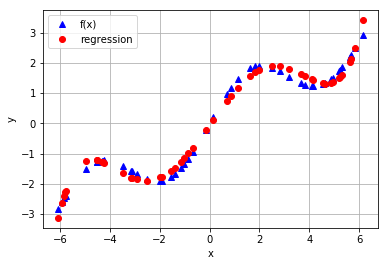

In [36]:
plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [37]:
def fm((x, y)):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [38]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)

Z = fm((X, Y))
x = X.flatten()
y = Y.flatten()

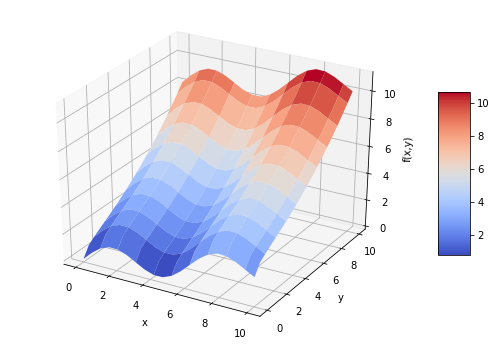

In [42]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [43]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [45]:
model = sm.OLS(fm((x, y)), matrix).fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.953e+30
Date:                Tue, 16 May 2017   Prob (F-statistic):               0.00
Time:                        18:59:36   Log-Likelihood:                 12175.
No. Observations:                 400   AIC:                        -2.434e+04
Df Residuals:                     393   BIC:                        -2.431e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -4.163e-15   3.77e-15     -1.104      0.270     -1.16e-14  3.25e-15
x1             0.2500   9.79e-16   2.55e+14      0.000         0.250     0.250
x2         -4.247e-15   3.19e-15     -1.330      0.184     -1.05e-14  2.03e-15
x3           -3.4e-16   9.41e-17     -3.613      0.000     -5.25e-16 -1.55e-16
x4             0.0500   1.66e-16   3.01e+14      0.000         0.050     0.050
x5             1.0000   1.17e-15   8.53e+14      0.000         1.000     1.000
x6             1.0000   6.25e-15    1.6e+14      0.000         1.000     1.000
==============================================================================
Omnibus:                       31.276   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.656
Skew:                           0.692   Prob(JB):                     2.98e-08
Kurtosis:                       2.593   Cond. No.                         587.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     1.000      
Dependent Variable: y                AIC:                -24335.6879
Date:               2017-05-16 18:59 BIC:                -24307.7476
No. Observations:   400              Log-Likelihood:     12175.     
Df Model:           6                F-statistic:        1.953e+30  
Df Residuals:       393              Prob (F-statistic): 0.00       
R-squared:          1.000            Scale:              2.1770e-28 
--------------------------------------------------------------------
         Coef.  Std.Err.          t           P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const   -0.0000   0.0000              -1.1041 0.2702 -0.0000  0.0000
x1       0.2500   0.0000 255243297731691.9062 0.0000  0.2500  0.2500
x2      -0.0000   0.0000              -1.3303 0.1842 -0.0000  0.0000
x3      -0.0000   0.0000              -3.6127 0.0003 -0.0000 -0.0000
x4       0.0500   0.0000 301432884477159.1250 0.0000  0.0500  0.0500
x5       1.0000   0.0000 852841333937530.5000 0.0000  1.0000  1.0000
x6       1.0000   0.0000 159910161924074.1250 0.0000  1.0000  1.0000
--------------------------------------------------------------------
Omnibus:               31.276        Durbin-Watson:           0.154 
Prob(Omnibus):         0.000         Jarque-Bera (JB):        34.656
Skew:                  0.692         Prob(JB):                0.000 
Kurtosis:              2.593         Condition No.:           587   
====================================================================

"""

In [49]:
model.rsquared

1.0

In [50]:
a = model.params
a

array([ -4.16333634e-15,   2.50000000e-01,  -4.24660307e-15,
        -3.40005801e-16,   5.00000000e-02,   1.00000000e+00,
         1.00000000e+00])

In [52]:
def reg_func(a, (x, y)):
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 + f2 + f1 + f0)

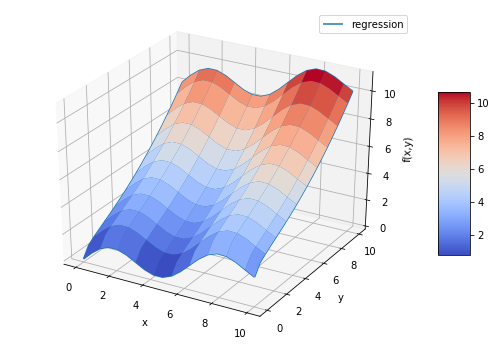

In [55]:
RZ = reg_func(a, (X, Y))
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2, label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)

In [57]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [59]:
ipo = spi.splrep(x, f(x), k=1)
iy = spi.splev(x, ipo)

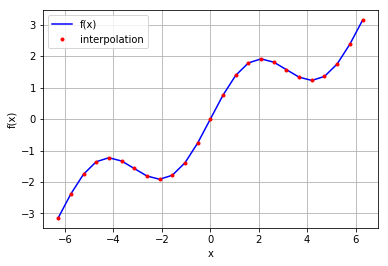

In [60]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [62]:
np.allclose(iy, f(x))

True

In [63]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

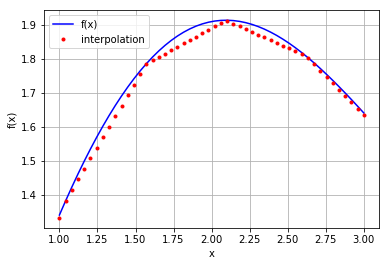

In [64]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [65]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

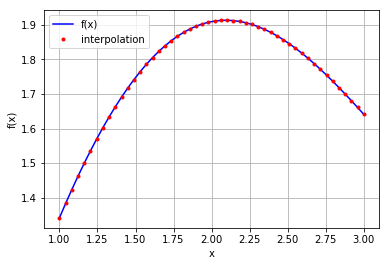

In [66]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [67]:
np.allclose(f(xd), iyd)

False

In [69]:
np.sum((f(xd) - iyd) ** 2) / len(xd)

1.1349319851436892e-08

In [70]:
def fm((x, y)):
    return (np.sin(x) + 0.05 * x ** 2
            + np.sin(y) + 0.05 * y ** 2)

In [71]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

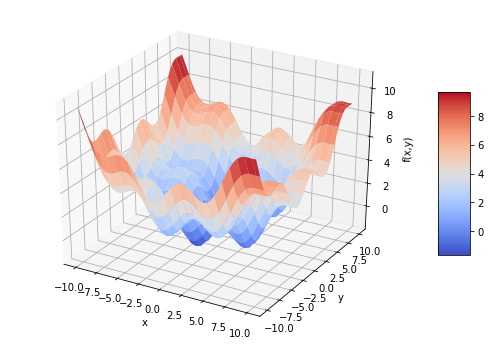

In [73]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [75]:
def fo((x, y)):
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print '%8.4f %8.4f %8.4f' % (x, y, z)
    return z

In [76]:
output = True
spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([ 0.,  0.])

In [81]:
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1

array([-1.4, -1.4])

In [82]:
fm(opt1)

-1.7748994599769203

In [84]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

In [85]:
fm(opt2)

-1.7757246992239009

In [86]:
output = False
spo.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([ 4.2710728 ,  4.27106945])

In [88]:
def Eu((s, b)):
    return -(.5 * sqrt(s * 15 + b * 5) + 0.5 * sqrt(s * 5 + b * 12))

cons = ({'type': 'ineq', 'fun': lambda (s, b): 100 - s * 10 - b * 10})
bnds = ((0, 1000), (0, 1000))

In [89]:
result = spo.minimize(Eu, [5, 5], method='SLSQP', bounds=bnds, constraints=cons)

In [90]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 8.02547122,  1.97452878])

In [91]:
result['x']

array([ 8.02547122,  1.97452878])

In [92]:
-result['fun']

9.700883611487832

In [94]:
a = 0.5
b = 9.5
x = np.linspace(0, 10)
y = f(x)

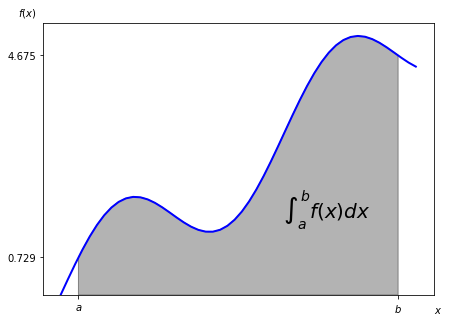

In [101]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)

Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

plt.text(.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20)
plt.figtext(.9, .075, '$x$')
plt.figtext(.075, .9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])

In [102]:
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [103]:
sci.quad(f, a, b)[0]

24.374754718086752

In [105]:
sci.romberg(f, a, b)

24.374754718086713

In [108]:
xi = np.linspace(.5, 9.5, 25)
sci.trapz(f(xi), xi)

24.352733271544516

In [109]:
sci.simps(f(xi), xi)

24.374964184550748

In [111]:
# Monte Carl for integration
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a
    print np.sum((f(x))) / len(x) * (b - a)

24.8047622793
26.5229188983
26.2655475192
26.0277033994
24.9995418144
23.8818101416
23.5279122748
23.507857659
23.6723674607
23.6794104161
24.4244017079
24.2390053468
24.115396925
24.4241919876
23.9249330805
24.1948421203
24.1173483782
24.1006909297
23.7690510985


In [115]:
x = sy.Symbol('x')
y = sy.Symbol('y')

In [116]:
sy.sqrt(x)

sqrt(x)

In [117]:
3 + sy.sqrt(x) - 4 ** 2

sqrt(x) - 13

In [118]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2

In [119]:
sy.simplify(f)

1.5*x**2 + 4

In [123]:
sy.init_printing()
print sy.pretty(f)

     2    
1.5⋅x  + 4


In [124]:
print sy.pretty(sy.sqrt(x) + .5)

√x + 0.5


In [125]:
sy.solve(x ** 2 - 1)

In [126]:
sy.solve(x ** 2 - 1 -3)

In [127]:
sy.solve(x**3 + .5 * x ** 2-1)